#Fake News Detection


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Dataset: Fake news content detection

In [3]:
data = pd.read_csv("/content/drive/MyDrive/train.csv")
data

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [4]:
data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [5]:
data.drop(['id','title','author'],axis=1,inplace=True)

In [6]:
data

,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,Ever get the feeling your life circles the rou...,0
2,"Why the Truth Might Get You Fired October 29, ...",1
3,Videos 15 Civilians Killed In Single US Airstr...,1
4,Print \nAn Iranian woman has been sentenced to...,1
...,...,...
20795,Rapper T. I. unloaded on black celebrities who...,0
20796,When the Green Bay Packers lost to the Washing...,0
20797,The Macy’s of today grew from the union of sev...,0
20798,"NATO, Russia To Hold Parallel Exercises In Bal...",1


In [7]:
data.rename(columns={'label':'target'}, inplace=True)

In [8]:
#drop null values
data=data.dropna()

In [9]:
data['target'].value_counts()

0    10387
1    10374
Name: target, dtype: int64

In [10]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [11]:
# Convert to lowercase
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,target
0,gabby douglas is a decorated olympic gymnast w...,0
1,gold medal olympian turned reality tv star cai...,0
2,bangkok — thailand’s crown prince ascended ...,0
3,donald j. trump enters the general election ca...,0
4,mexico city — two days after jorge antonio ...,0


In [12]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [13]:
data

,text,target
0,gabby douglas is a decorated olympic gymnast w...,0
1,gold medal olympian turned reality tv star cai...,0
2,bangkok — thailand’s crown prince ascended ...,0
3,donald j trump enters the general election cam...,0
4,mexico city — two days after jorge antonio ...,0
...,...,...
20756,las imágenes libres de derechos más destacadas...,1
20757,want to get this briefing by email here’s the ...,0
20758,fuck you i am not a doormat go home mamas boy ...,1
20759,advertisement,0


In [14]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
data.head()

,text,target
0,gabby douglas decorated olympic gymnast bring ...,0
1,gold medal olympian turned reality tv star cai...,0
2,bangkok — thailand’s crown prince ascended thr...,0
3,donald j trump enters general election campaig...,0
4,mexico city — two days jorge antonio parral ra...,0


target
0    10387
1    10374
Name: text, dtype: int64


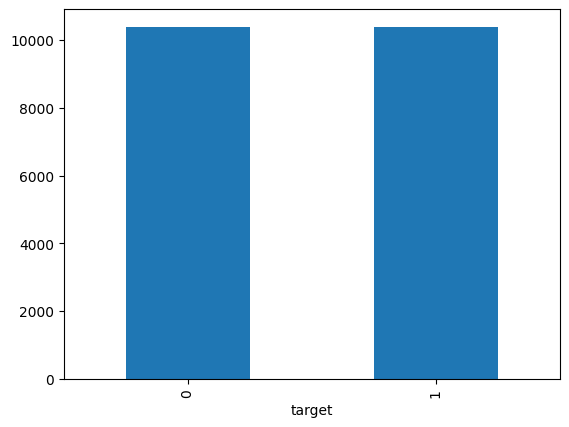

In [16]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

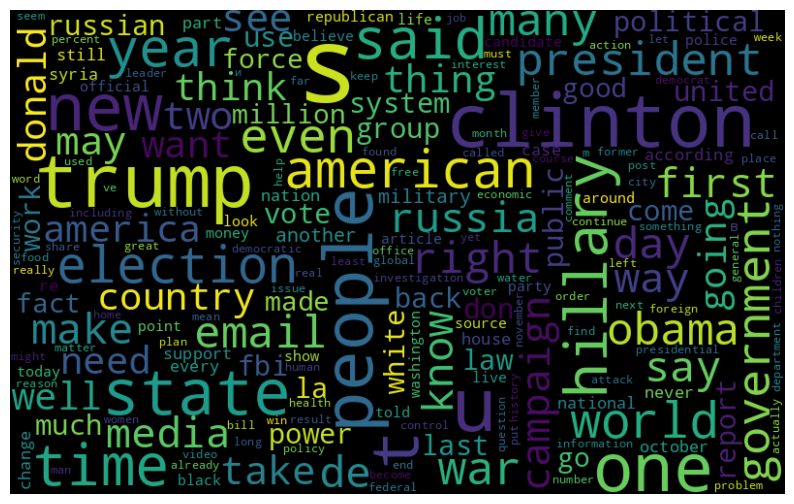

In [17]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == 1]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

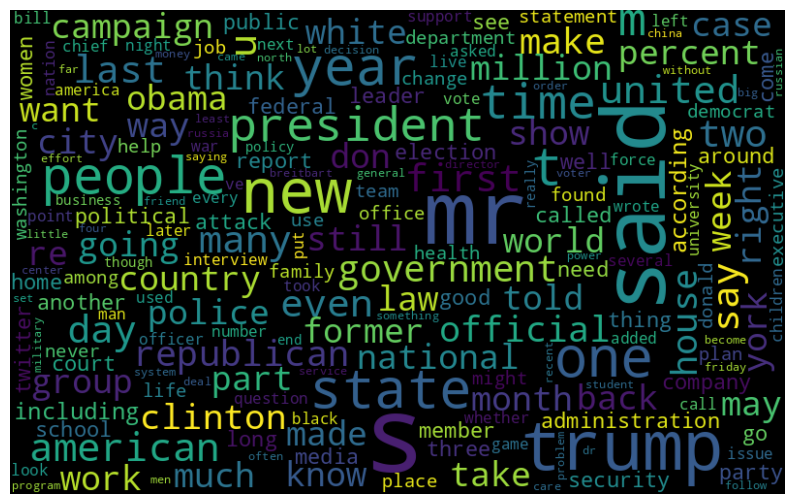

In [18]:
# Word cloud for real news
from wordcloud import WordCloud

fake_data = data[data["target"] == 0]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [19]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

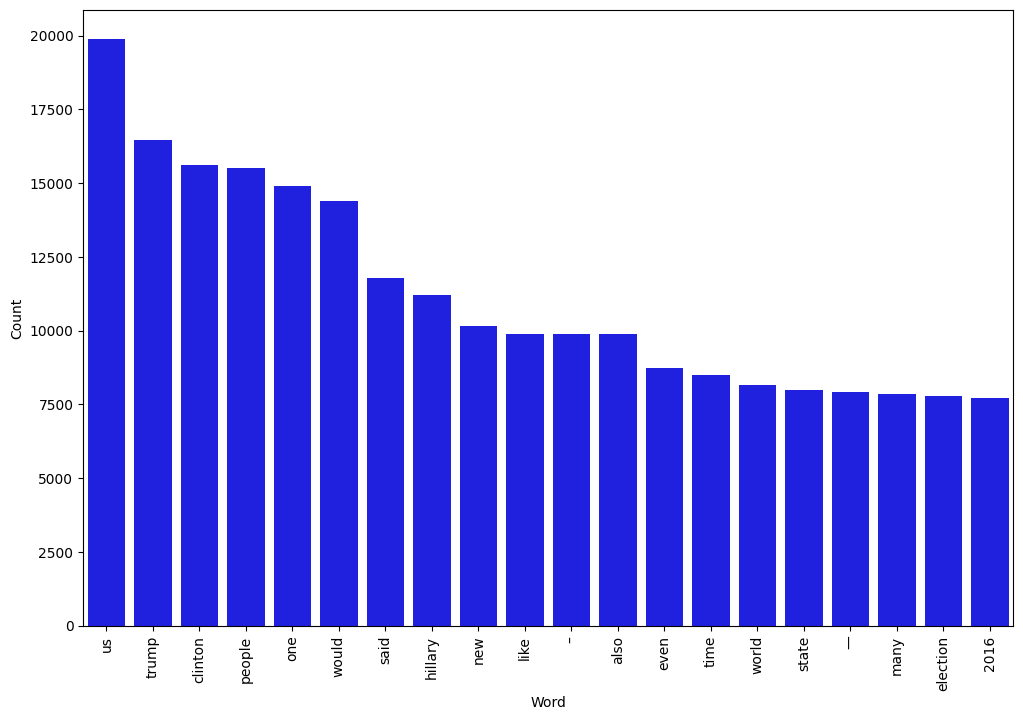

In [20]:
# Most frequent words in fake news
counter(data[data["target"] == 1], "text", 20)

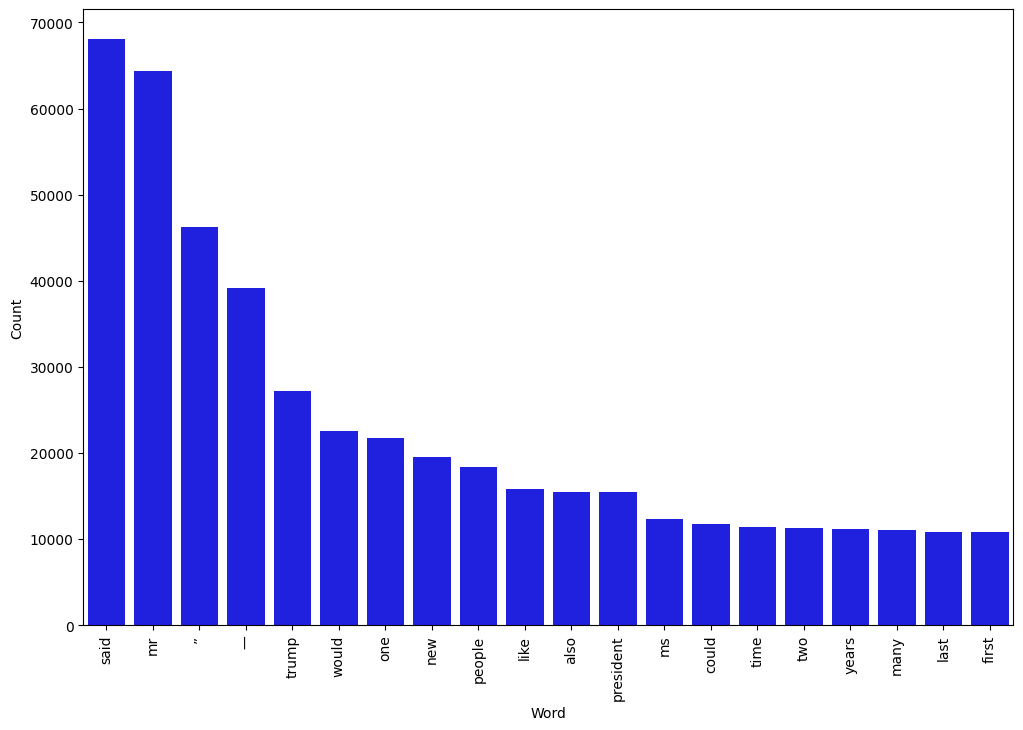

In [21]:
# Most frequent words in real news
counter(data[data["target"] == 0], "text", 20)

In [22]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

#Naive Bayes

In [24]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 85.1%


In [25]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.78      0.99      0.87      2111
        Real       0.99      0.70      0.82      2042

    accuracy                           0.85      4153
   macro avg       0.88      0.85      0.85      4153
weighted avg       0.88      0.85      0.85      4153



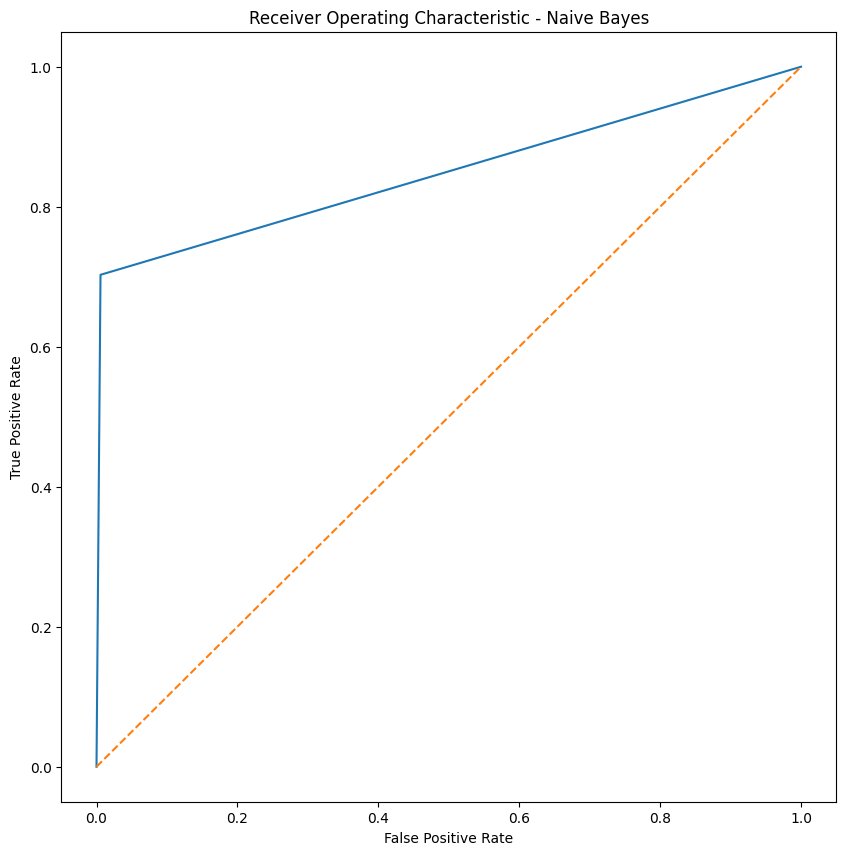

In [26]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Naive Bayes')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_nb=fpr
tpr_nb=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


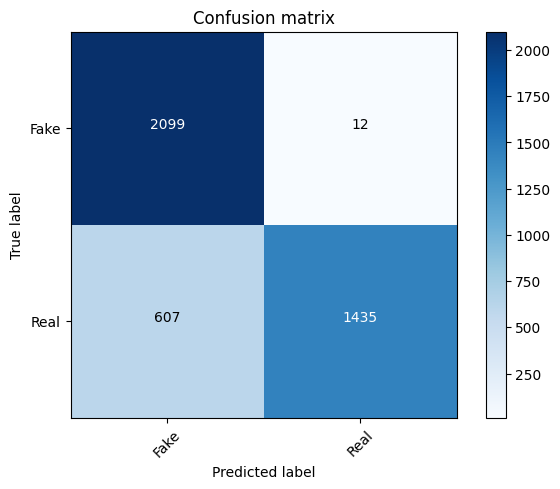

In [27]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy",random_state=65))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 91.07%


In [30]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.89      0.94      0.91      2111
        Real       0.93      0.88      0.91      2042

    accuracy                           0.91      4153
   macro avg       0.91      0.91      0.91      4153
weighted avg       0.91      0.91      0.91      4153



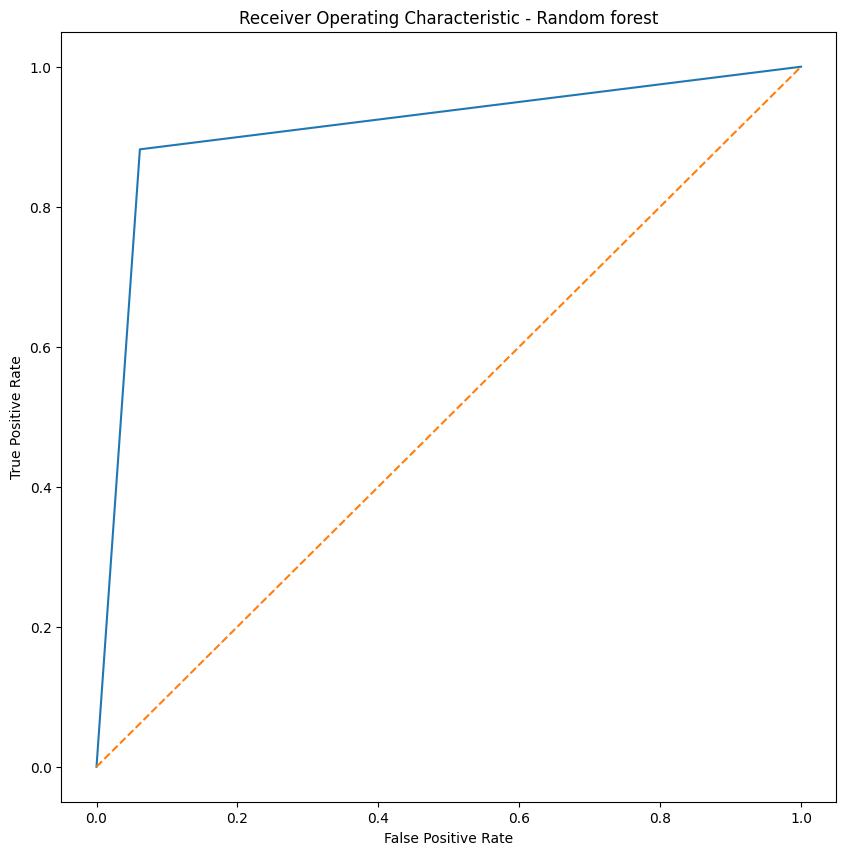

In [31]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Random forest')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_rf=fpr
tpr_rf=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


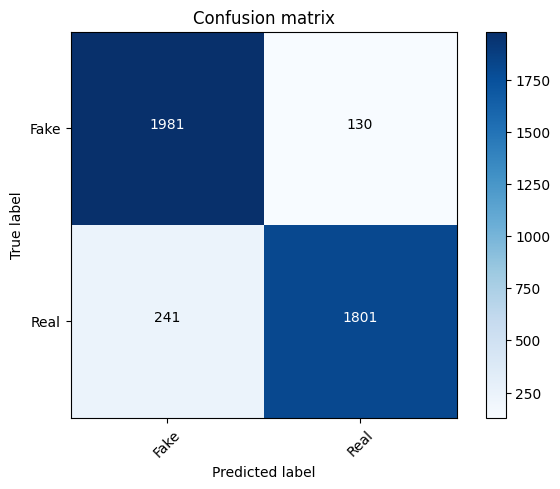

In [32]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#SVM

In [33]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear',random_state=65) # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 95.98%


In [34]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.96      0.96      0.96      2111
        Real       0.96      0.95      0.96      2042

    accuracy                           0.96      4153
   macro avg       0.96      0.96      0.96      4153
weighted avg       0.96      0.96      0.96      4153



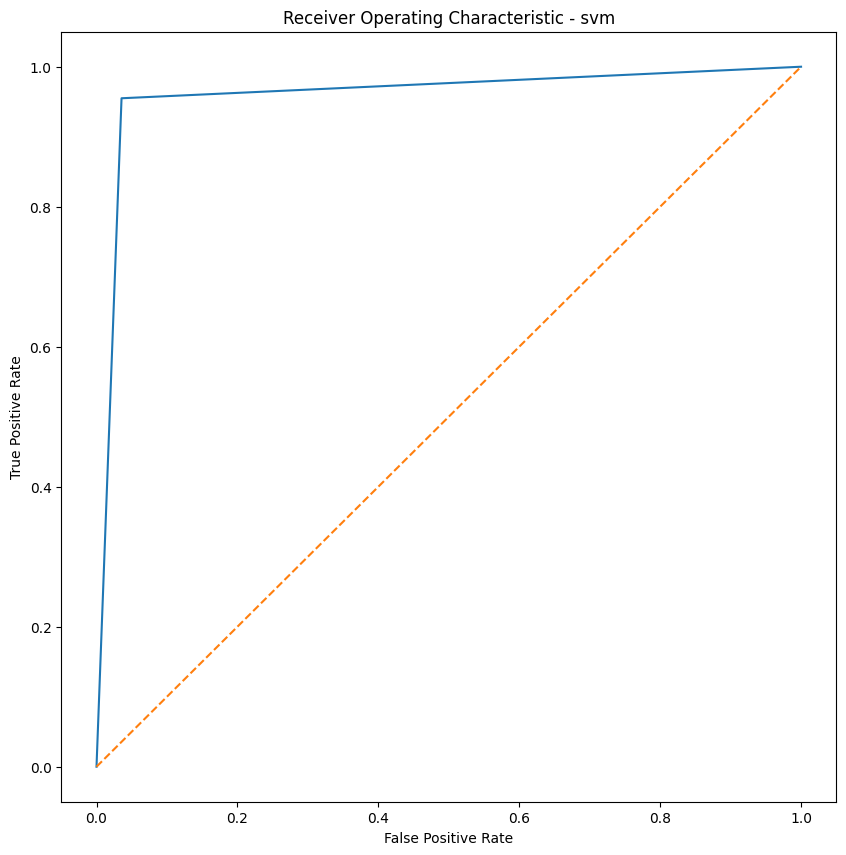

In [35]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - svm')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_svm=fpr
tpr_svm=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


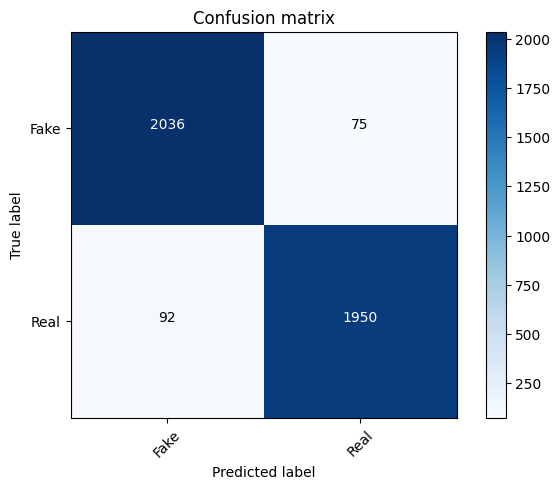

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

#Gradient Boost

In [37]:
from sklearn.ensemble import GradientBoostingClassifier

pipe = Pipeline([
        ('vect', CountVectorizer()),
        ('tfidf', TfidfTransformer()),
        ('model', GradientBoostingClassifier(learning_rate=0.1,
                                              n_estimators=200,
                                             random_state=65))
    ])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)

print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Gradient Boost'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 94.56%


In [38]:
from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, prediction, target_names=target_names))

              precision    recall  f1-score   support

        Fake       0.96      0.93      0.95      2111
        Real       0.93      0.96      0.95      2042

    accuracy                           0.95      4153
   macro avg       0.95      0.95      0.95      4153
weighted avg       0.95      0.95      0.95      4153



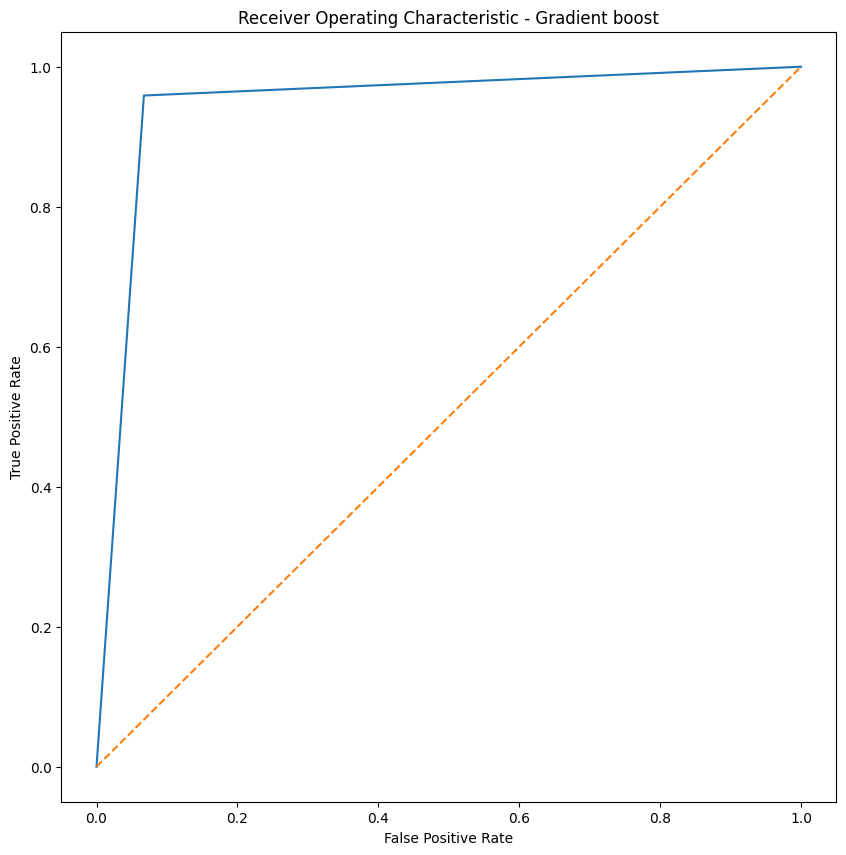

In [39]:
from sklearn import metrics
fpr,tpr,thresholds = metrics.roc_curve(y_test,prediction,pos_label=1)
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Gradient boost')
plt.plot(fpr, tpr,'-')
plt.plot([0, 1], ls="--")
fpr_gb=fpr
tpr_gb=tpr
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion matrix, without normalization


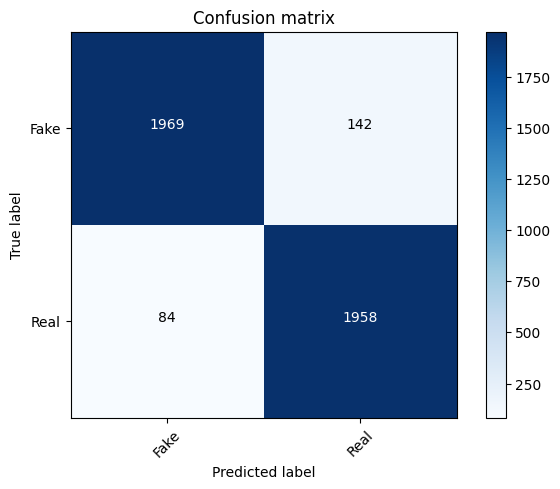

In [40]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

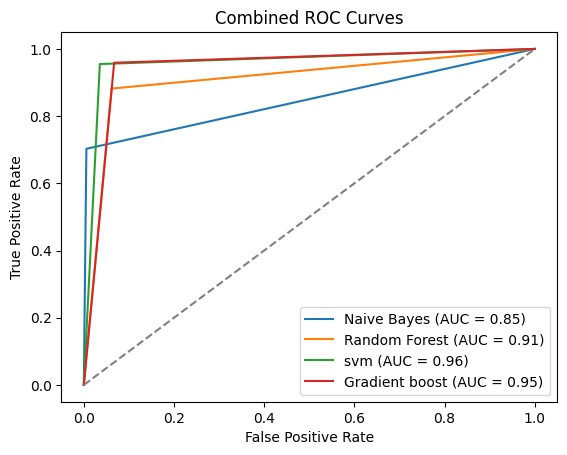

In [41]:
from sklearn.metrics import roc_auc_score
roc_curves = [
    ('Naive Bayes', (fpr_nb, tpr_nb)),
    ('Random Forest', (fpr_rf, tpr_rf)),
    ('svm', (fpr_svm, tpr_svm)),
    ('Gradient boost', (fpr_gb, tpr_gb))
]
def calculate_auc(tpr, fpr):
    # Sort the FPR and TPR in ascending order of FPR
    sorted_indices = sorted(range(len(fpr)), key=lambda k: fpr[k])
    sorted_fpr = [fpr[i] for i in sorted_indices]
    sorted_tpr = [tpr[i] for i in sorted_indices]

    # Calculate AUC using the trapezoidal rule
    auc = 0.0
    for i in range(1, len(sorted_fpr)):
        auc += 0.5 * (sorted_tpr[i] + sorted_tpr[i - 1]) * (sorted_fpr[i] - sorted_fpr[i - 1])

    return auc

for model_name, (fpr, tpr) in roc_curves:
  # Replace y_true and y_scores with your actual data
    auc = calculate_auc(tpr, fpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Plotting the diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves')
plt.legend()
plt.show()


([<matplotlib.axis.YTick at 0x7f89113f95a0>,
 [Text(0, 65, '65'),
  Text(0, 70, '70'),
  Text(0, 75, '75'),
  Text(0, 80, '80'),
  Text(0, 85, '85'),
  Text(0, 90, '90'),
  Text(0, 95, '95'),
  Text(0, 100, '100')])

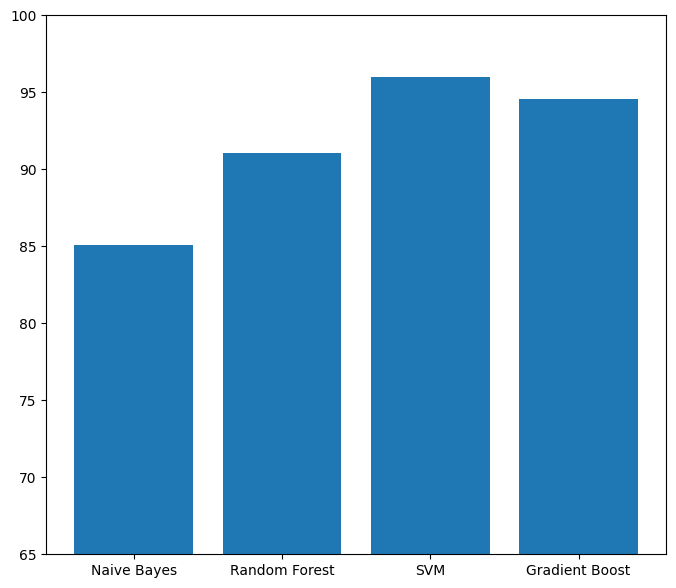

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((65,70, 75,80, 85,90, 95, 100))